# Midterm Exam: Thursday, October 7

Please check your email to find the time you are scheduled to take the exam.

**All exam will be proctored with Honorlock.**

## <font color=blue>Allowed Material:</font>

1. **Formula sheet**: 1-page letter-sized of **formulas** (front and back, handwritten or typed)
    * Other than labeling your equations, **DO NOT** include *any* definitions, pseudo-code or any algorithm description
    * You must submit your formula sheet along with your handwritten solutions
2. **Calculator**: scientific calculator
3. **Writing paper**: 5 sheets (letter-sized) will suffice
    * Some questions will be typed directly in the Canvas quiz, others will be solved on paper
    * During the Honorlock 360 room scan, please show to the camera the clear writing sheets of paper and your formula sheet
4. **Additional Electronic Device**: please have your phone, tablet or other device available with the [CamScanner](https://www.camscanner.com/) app installed. 
    * This device is only to be used at the end of the exam to take pictures of your handwritten solutions AND formula sheet
    * You will be able to open a second tab to download the files
    

## <font color=orange>TOTAL TIME:</font> 2 hours + 15 minutes

**<font color=red>Communications between students or anyone else is considered cheating. Turn off all Slack notifications and other communications channels!</font>**
 
Ten (10) minutes prior to the time you are scheduled to take the exam, you will be able to see the Midterm Exam quiz in Canvas.

Make sure your testing environment is comfortable, and start whenever you are ready.

# Lecture 18 - Midterm Exam Review

## Midterm Exam Coverage

The midterm exam will cover all materials from Lecture 1-17. These include:

1. **Introduction to Machine Learning <font color=blue>(Lectures 1-3)</font>**
    * Definition of Machine Learning, Artificial Intelligene and Deep Learning
    * Types of learning in Machine Learning
    * Supervised Learning diagram
    * (Linear) Regression
    * Performance Metrics for regression: error metrics, Q-Q plot, hypothesis test, confidence intervals
    
2. **Experimental Design and Analysis <font color=blue>(Lectures 4-9)</font>**
    * Feature representation: polynomial basis function, radial basis function, etc.
    * Model selection
    * Occam's Razor
    * Generalization
    * Regularization: ridge and lasso
    * Cross-Validation
    * The No Free Lunch Theorem
    * The Bias-Variance Trade-Off
    * Experimental Design
    * Hyperparameters tuning
    * The Curse of Dimensionality
    
3. **Bayesian Learning <font color=blue>(Lectures 10-13)</font>**
    * Frequentist vs Bayesian statistics
    * Bayesian interpretation of Regression Least Squares Objective Function 
    * Maximum Likelihood Estimation (MLE)
    * Maximum A Posteriori (MAP)
    * Bayesian Prior Equivalence
    * Conjugate Priors, Online update
    
4. **Generative Classification <font color=blue>(Lectures 14-17)</font>**
    * Distinction between classification and regression
    * Probabilistic Generative Models
    * Naive Bayes Classifier
    * Expectation-Maximization Algorithm
    * Gaussian Mixture Models

## How to prepare for exam

**This is a suggestion only.**

1. Review/read all Notebooks.

2. Create your formula sheet. **Do not include pseudo-code or solutions to examples in homework assignments.** 

3. Review/redo exercises from Part 1 of HW1 and HW2. 

4. Review/redo exercises from SA1, SA2, SA3 and discussion boards 1 and 2.

5. Solve practice exam.

## Discussion Board Questions

Thank you for posting your questions!

## Post 1

*I understand all the concepts conceptually but am currently finding myself struggling when it comes to deriving equations such as finding Bayesian interpretation of functions (much like in the HW2). If you could go over general strategies with some examples on how to approach these problem types, I would appreciate it!*

Let's review the exercise we did in lecture 11 and 12. 

Consider the experiment where we flip *a* coin. We are interested in estimating the probability of flipping heads as new samples from this experiment arrive.

Let heads=1 and tails=0, so our sample space is $S=\{1,0\}$. We can model the data likelihood as a Bernoulli distribution:

$$P(x|\mu) = \mu^x(1-\mu)^{1-x} = \begin{cases}\mu, & x=1 \\ 1-\mu, & x=0 \\ 0, & \text{otherwise}  \end{cases}$$

Further assume that we have *prior knowledge* that the unknown parameter we are trying to estimate ($\mu \equiv$ probability of flipping heads) is a random variable and we will assume that it follows a Beta distribution:

$$\text{Beta}(\mu|\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \mu^{\alpha-1} (1-\mu)^{\beta-1}$$

where $\Gamma(x) = (x-1)!$ and $\alpha,\beta>0$.

We can now solve for the parameter $\mu$ using the MAP approach:

$$\arg_{\mu} \max P(\mu|X) = \arg_{\mu}\max \ln P(\mu|X)$$

Let $\mathcal{L} = \ln P(\mu|X)$.

We write the posterior probability as:

\begin{align}
P(\mu|X) &= \frac{P(X|\mu)P(\mu)}{P(X)}\\
&\propto P(X|\mu)P(\mu)\\
&\propto \left(\prod_{n=1}^N \mu^{x_n} (1-\mu)^{1-x_n}\right) \mu^{\alpha-1} (1-\mu)^{\beta-1} \\
&= \mu^m (1-\mu)^l \mu^{\alpha-1} (1-\mu)^{\beta-1} \\
&= \mu^{m+\alpha-1} (1-\mu)^{l+\beta-1}
\end{align}

where $m$ the number of heads, $l$ the number of tails, and $N=m+l$ the total number of coin flips.

* This defines a Conjugate Prior relationship as the prior and the posterior follow the same shape.

* In an online environment (i.e. as new samples are coming), we can update the prior with the posterior distribution. By inspecting the posterior result, we see that:
    * $\alpha \leftarrow \alpha+m$ and $\beta = \beta + l$.
    * We "replace the prior with the posterior" by updating the parameters of the prior distributions with those of the new posterior.

Then
\begin{align*}
\mathcal{L} &= \ln P(\mu|X)\\
&\propto \ln\left(\mu^{m+\alpha-1} (1-\mu)^{l+\beta-1}\right)\\
&= (m+\alpha-1)\ln(\mu) + (l+\beta-1)\ln(1-\mu)\\
\end{align*}

We can now *optimize* our posterior probability:

\begin{align}
\frac{\partial  \ln \left( P(\mu|E) \right)}{\partial \mu} &= 0\\
\frac{m+\alpha-1}{\mu} + \frac{l+\beta-1}{1-\mu} &= 0\\
\mu &= \frac{m+\alpha-1}{m + l + \alpha + \beta -2}
\end{align}

This is our estimation of the probability of heads using MAP!

In [1]:
import numpy as np
import scipy.stats as stats
from scipy.stats import beta
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

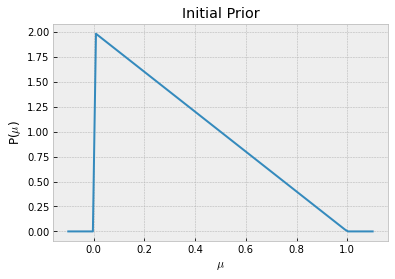

Alpha =  1
Beta =  2


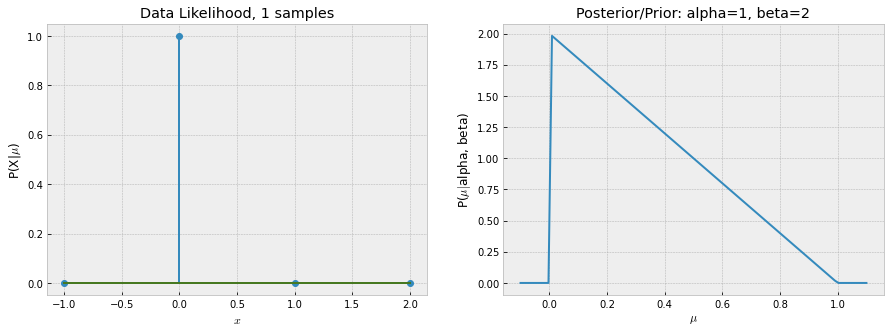

Number of samples:  1
Data:  [0]
MAP estimate mu =  0.0
New alpha =  1
New beta =  3


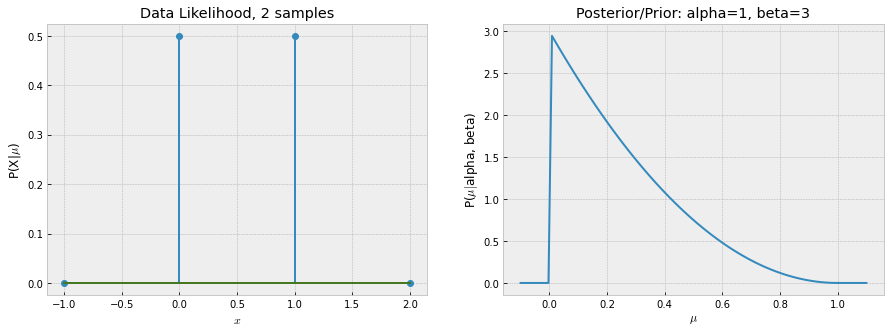

Number of samples:  2
Data:  [0, 1]
MAP estimate mu =  0.25
New alpha =  2
New beta =  4


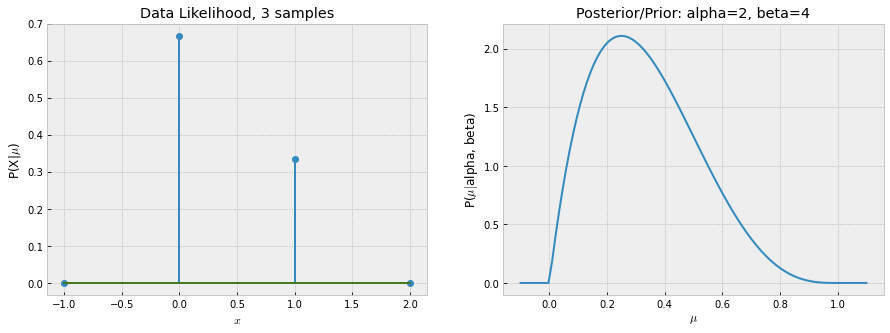

Number of samples:  3
Data:  [0, 1, 0]
MAP estimate mu =  0.2857142857142857
New alpha =  3
New beta =  6


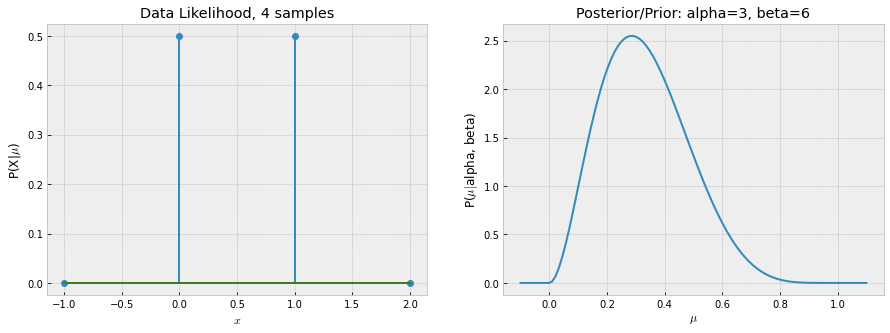

Number of samples:  4
Data:  [0, 1, 0, 1]
MAP estimate mu =  0.36363636363636365
New alpha =  5
New beta =  8


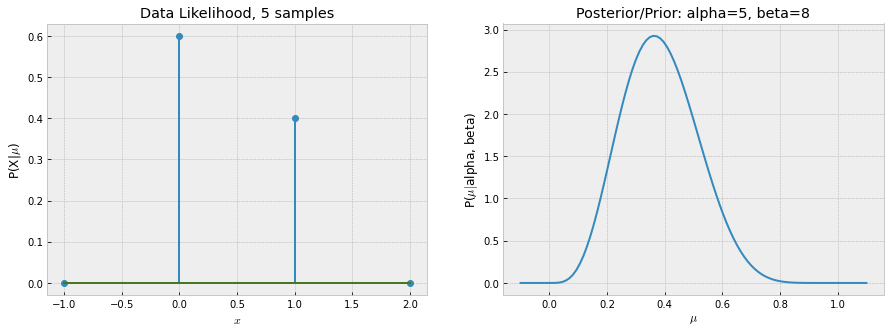

Number of samples:  5
Data:  [0, 1, 0, 1, 0]
MAP estimate mu =  0.375
New alpha =  7
New beta =  11


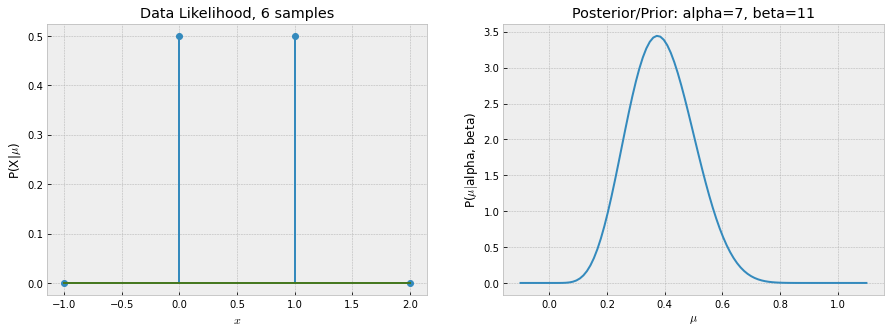

Number of samples:  6
Data:  [0, 1, 0, 1, 0, 1]
MAP estimate mu =  0.4090909090909091
New alpha =  10
New beta =  14


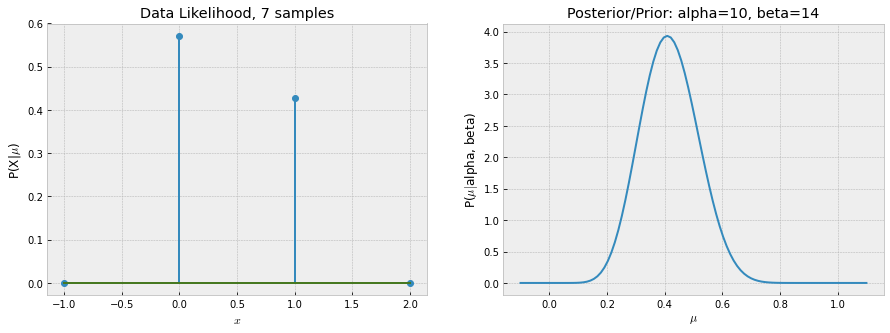

Number of samples:  7
Data:  [0, 1, 0, 1, 0, 1, 0]
MAP estimate mu =  0.41379310344827586
New alpha =  13
New beta =  18


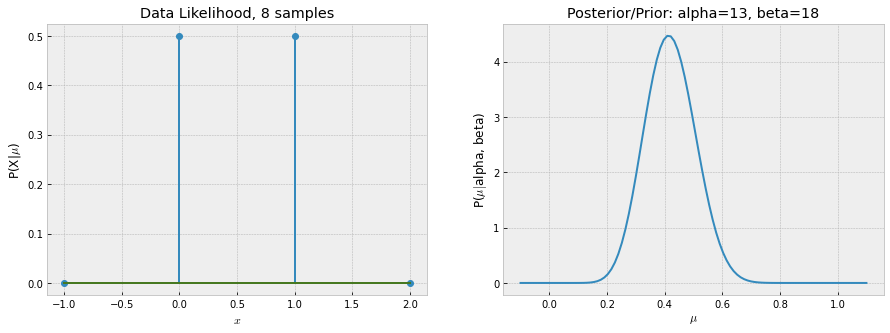

Number of samples:  8
Data:  [0, 1, 0, 1, 0, 1, 0, 1]
MAP estimate mu =  0.43243243243243246
New alpha =  17
New beta =  22


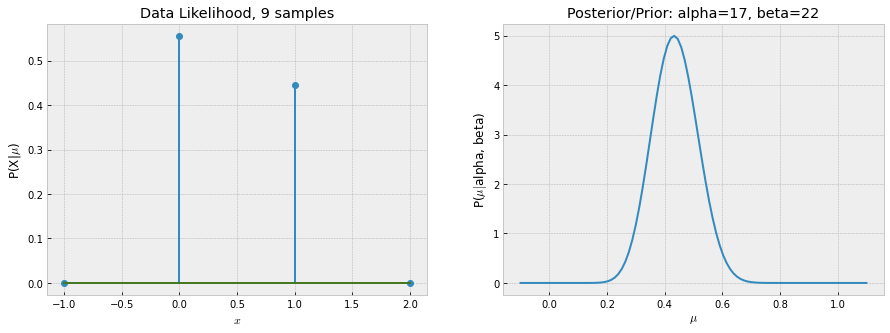

Number of samples:  9
Data:  [0, 1, 0, 1, 0, 1, 0, 1, 0]
MAP estimate mu =  0.43478260869565216
New alpha =  21
New beta =  27


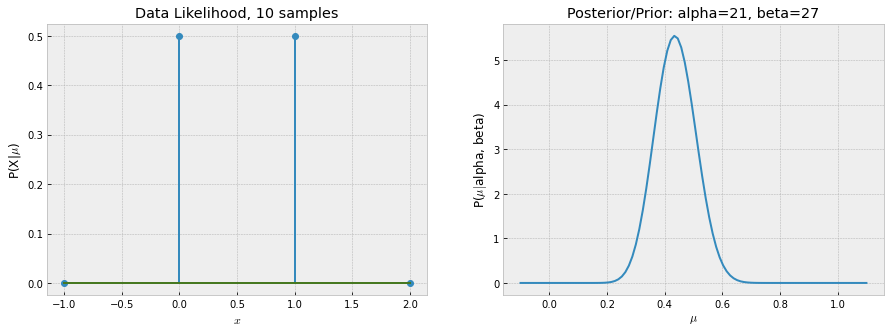

Number of samples:  10
Data:  [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
MAP estimate mu =  0.44642857142857145
New alpha =  26
New beta =  32


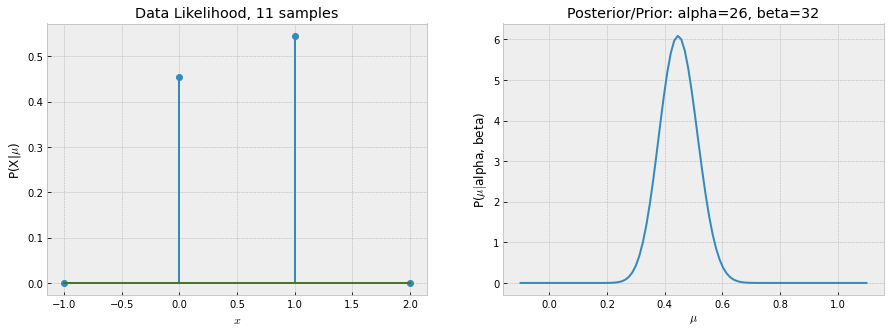

Number of samples:  11
Data:  [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
MAP estimate mu =  0.4626865671641791
New alpha =  32
New beta =  37


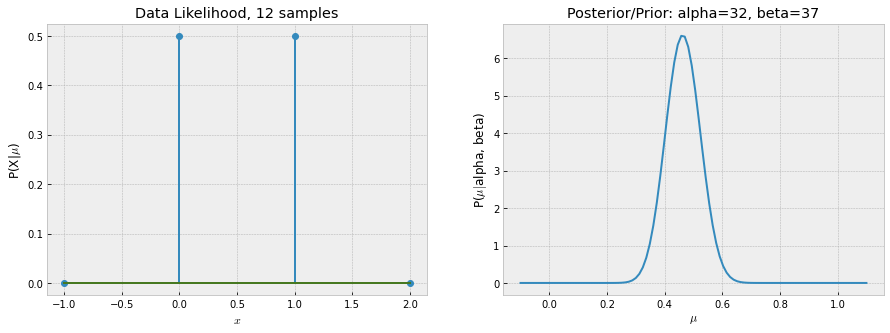

Number of samples:  12
Data:  [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
MAP estimate mu =  0.46835443037974683
New alpha =  38
New beta =  43


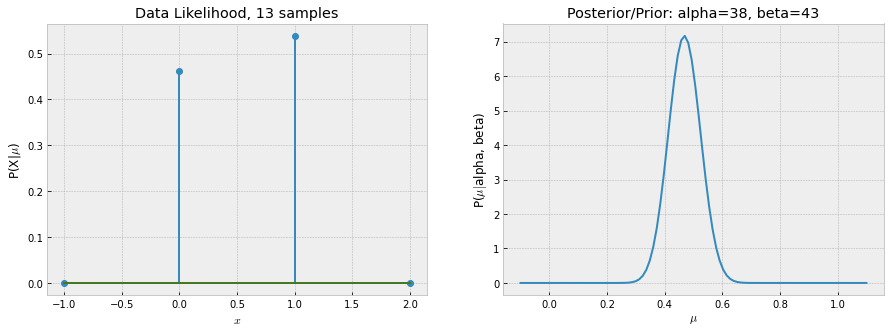

Number of samples:  13
Data:  [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]
MAP estimate mu =  0.4782608695652174
New alpha =  45
New beta =  49


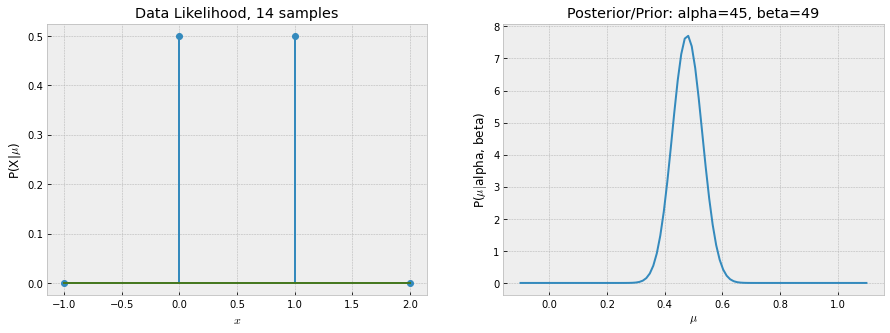

Number of samples:  14
Data:  [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
MAP estimate mu =  0.4811320754716981
New alpha =  52
New beta =  56


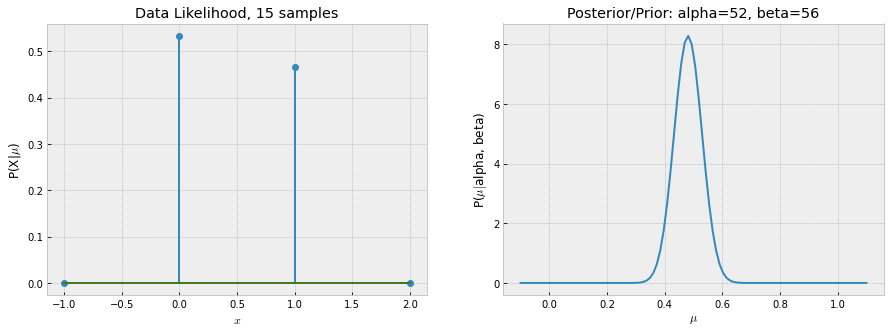

Number of samples:  15
Data:  [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0]
MAP estimate mu =  0.4793388429752066
New alpha =  59
New beta =  64


In [2]:
trueMU = 0.5 # 0.5 for a fair coin
a = 1 # alpha
b = 2 # beta

x = np.linspace(-0.1,1.1,100)
xr = range(-1,3)
plt.plot(x, stats.beta(a,b).pdf(x))
plt.xlabel('$\mu$'); plt.ylabel('P($\mu$)'); plt.title('Initial Prior')
plt.show()

print('Alpha = ', a)
print('Beta = ', b)

Outcomes=[]
for N in range(1,16):
    Outcomes += [stats.bernoulli(trueMU).rvs(size=1)[0]]
    # Outcomes will have 1's or 0's (1 - Heads, 0 - Tails) 
    estimate_mu = (np.sum(Outcomes)+a-1)/(len(Outcomes)+a+b-2)
    
    # Data Likelihood:
    fig=plt.figure(figsize=(15,5))
    fig.add_subplot(1,2,1)
    plt.stem(xr, stats.bernoulli(np.sum(Outcomes)/len(Outcomes)).pmf(xr))
    plt.xlabel('$x$'); plt.ylabel('P(X|$\mu$)'); 
    plt.title('Data Likelihood, '+str(N)+' samples')
    
    # Posterior/Prior:
    fig.add_subplot(1,2,2)
    plt.plot(x, stats.beta(a,b).pdf(x))
    plt.xlabel('$\mu$'); plt.ylabel('P($\mu|$alpha, beta)'); 
    plt.title('Posterior/Prior: alpha='+str(a)+', beta='+str(b))
    plt.show()
    
    # Update Prior distribution
    a += np.sum(Outcomes)
    b += len(Outcomes)-np.sum(Outcomes)
    
    # Print estimate for mu
    print('Number of samples: ', len(Outcomes))
    print('Data: ',Outcomes)
    print('MAP estimate mu = ', estimate_mu)
    print('New alpha = ', a)
    print('New beta = ', b)

## Another Example: Exercise 7 from Practice Midterm

Given $N$ data points, $\mathbf{X}=\{x_i\}_{i=1}^N$, all non-negative (i.e. $x_i\geq 0$). Assume the input samples $\mathbf{X}$ are independent and identically distributed (i.i.d.), and each sample comes from an Exponential distribution

$$p(x|\lambda) = \begin{cases}\lambda e^{-\lambda x} & x\geq 0\\0 & x<0 \end{cases}$$

with a Gamma prior distribution on the rate parameter, $\lambda$,

$$p(\lambda|\alpha,\beta) = \frac{1}{\Gamma(\alpha)} \beta^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}$$

Using clean paper, answer the following questions:

1. (5 points) Derive the maximum likelihood estimate (MLE) for the rate parameter $\lambda$.

2. (5 points) Derive the maximum a posteriori (MAP) estimate for the rate parameter $\lambda$.

3. (5 points) Is the Gamma distribution a conjugate prior for the rate parameter $\lambda$ of the exponential distribution? Why or why not?

4. (5 points) Suppose you would like to update the Gamma prior distribution and your MAP estimate of $\lambda$ in an online fashion, as you obtain more data. Using precise language (namely, pseudo-code and the equations you derived in part (2)), how would you update the prior distribution and your estimate of $\lambda$ in an online fashion?

1. Let's define the observed data likelihood:

$$\mathcal{L}^0 = \prod_{i=1}^N p(x_i|\lambda) = \prod_{i=1}^N \lambda e^{-\lambda x_i} = \lambda^N e^{-\lambda\sum_{i=1}^N x_i}$$

Applying the log-function:

$$\mathcal{L} = \ln \mathcal{L}^0 = N \ln\lambda -\lambda \sum_{i=1}^N x_i$$

Solving for $\lambda$:

\begin{align}
\frac{\partial \mathcal{L}}{\partial \lambda} &= 0\\
\frac{N}{\lambda} - \sum_{i=1}^N x_i &= 0\\
\lambda_{\text{MLE}} &= \frac{N}{\sum_{i=1}^N x_i}
\end{align}

2. Let's define the observed data likelihood:

$$\mathcal{L}^0 = \prod_{i=1}^N p(x_i|\lambda)p(\lambda|\alpha,\beta) = \left(\prod_{i=1}^N \lambda e^{-\lambda x_i}\right)\frac{1}{\Gamma(\alpha)} \beta^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda} = \frac{1}{\Gamma(\alpha)} \beta^{\alpha}\lambda^{N+\alpha-1}e^{-\lambda\left(\beta + \sum_{i=1}^N x_i\right)}$$

Applying the log-function:

$$\mathcal{L} = \ln \mathcal{L}^0 = -ln \Gamma(\alpha) + \alpha\ln\beta + (N+\alpha-1)\ln\lambda -\lambda \left(\beta + \sum_{i=1}^N x_i\right)$$

Solving for $\lambda$:

\begin{align}
\frac{\partial \mathcal{L}}{\partial \lambda} &= 0\\
\frac{N+\alpha-1}{\lambda} - \beta \sum_{i=1}^N x_i &=0\\
\lambda_{\text{MAP}} &= \frac{N+\alpha-1}{\beta +\sum_{i=1}^N x_i}
\end{align}

3. Yes, because the posterior probability (defined as $\mathcal{L}^0$ in 2) is proportional to an exponential distribution. We say that the prior-posterior have a conjugate prior relationship.

4. The pseudo-code is as follows:
    
    1. Initialize the parameters of the prior ditribution, $\alpha$ and $\beta$.
        * Compute the prior probability $p(\lambda|\alpha,\beta)$.
    2. As new data arrives to $\mathbf{X}$, do:
        * Compute the data likelihood $P(\mathbf{X}|\lambda)$.
        * Compute the posterior probability $P(\lambda|\mathbf{X})\propto P(\mathbf{X}|\lambda)P(\lambda|\alpha,\beta)$
    3. Update the prior distribution with the posterior distribution
        * That is, replace the parameters $\alpha$ and $\beta$ with those estimated for the posterior
        * This will produce a new informed prior distribution.
    4. Go back to step B.
    
    
$$\lambda_{\text{MAP}} = \frac{N+\alpha-1}{\beta +\sum_{i=1}^N x_i}$$

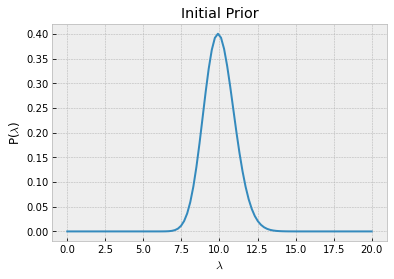

Alpha =  100
Beta =  10


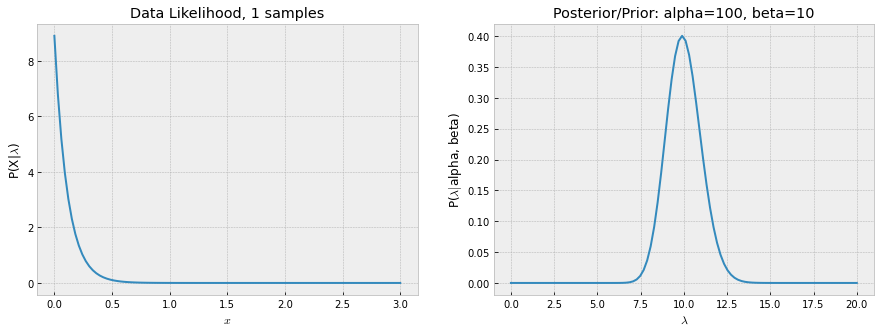

Number of samples:  1
MAP estimate LAMBDA =  8.90192785920844
New alpha =  101
New beta =  11.233521724910048


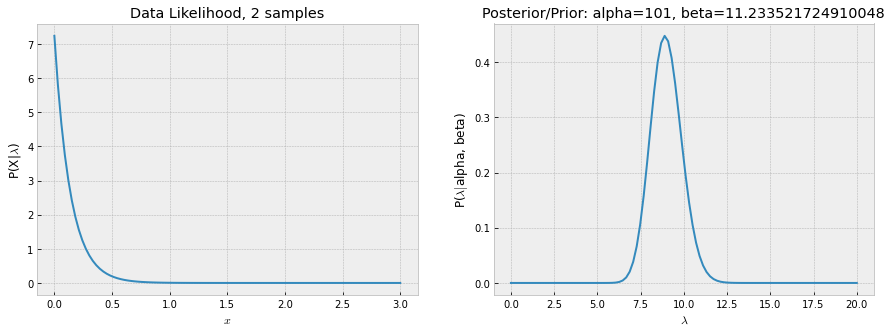

Number of samples:  2
MAP estimate LAMBDA =  7.242682736843209
New alpha =  103
New beta =  14.083179355783525


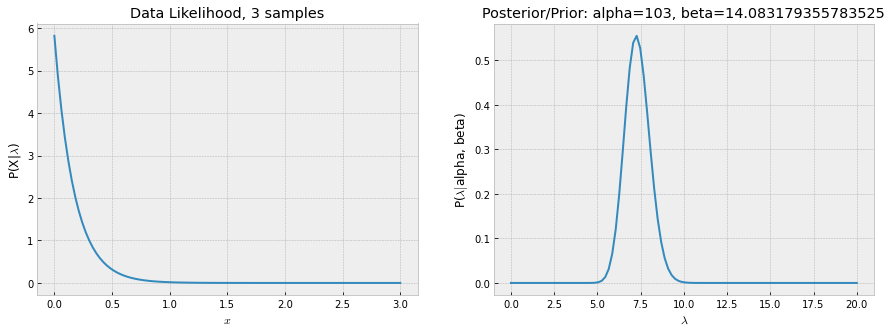

Number of samples:  3
MAP estimate LAMBDA =  5.821155131219516
New alpha =  106
New beta =  18.037657068589887


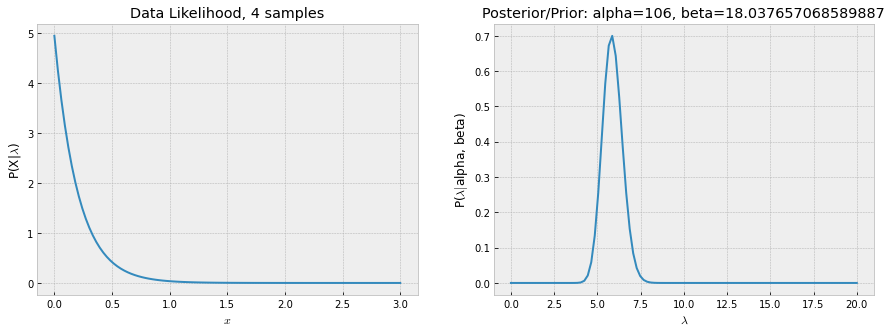

Number of samples:  4
MAP estimate LAMBDA =  4.941296954419069
New alpha =  110
New beta =  22.05898593131907


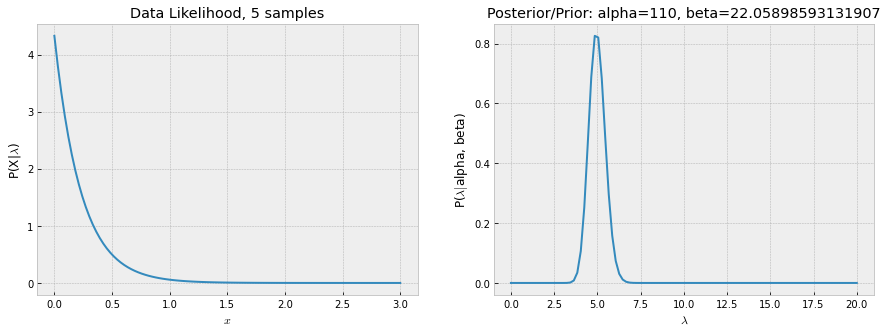

Number of samples:  5
MAP estimate LAMBDA =  4.326888026067991
New alpha =  115
New beta =  26.346880093311817


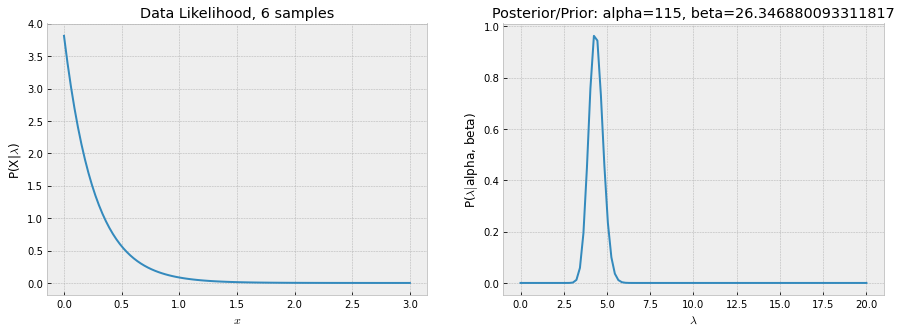

Number of samples:  6
MAP estimate LAMBDA =  3.813576714468357
New alpha =  121
New beta =  31.466523157835294


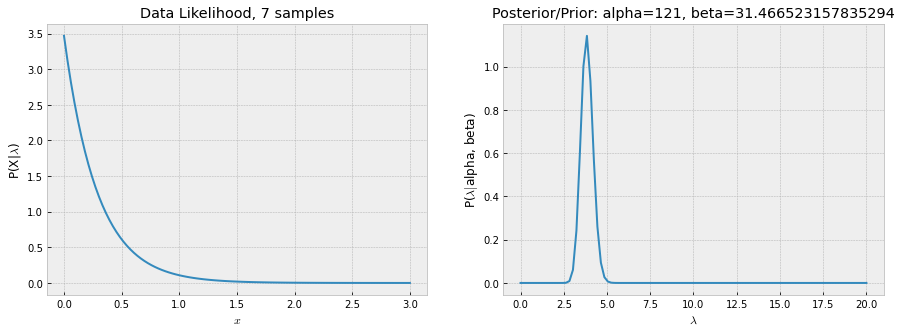

Number of samples:  7
MAP estimate LAMBDA =  3.4682180839935506
New alpha =  128
New beta =  36.618227840437086


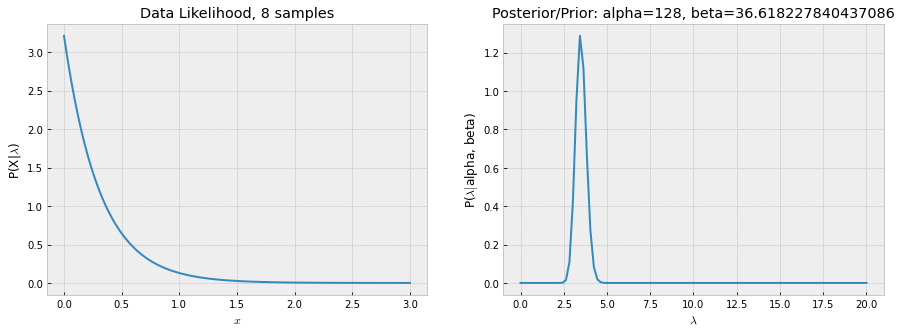

Number of samples:  8
MAP estimate LAMBDA =  3.212760612398783
New alpha =  136
New beta =  42.01993745783732


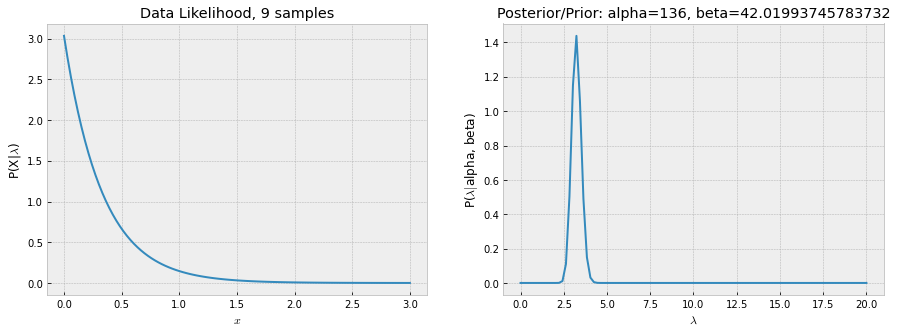

Number of samples:  9
MAP estimate LAMBDA =  3.034018415716885
New alpha =  145
New beta =  47.46180815978183


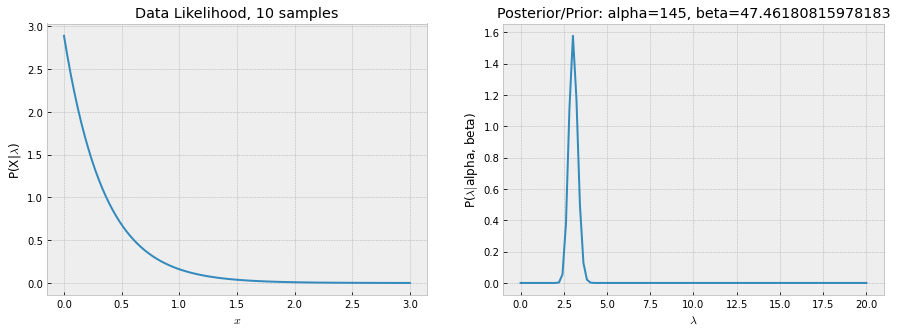

Number of samples:  10
MAP estimate LAMBDA =  2.888048392905917
New alpha =  155
New beta =  53.323206210214224


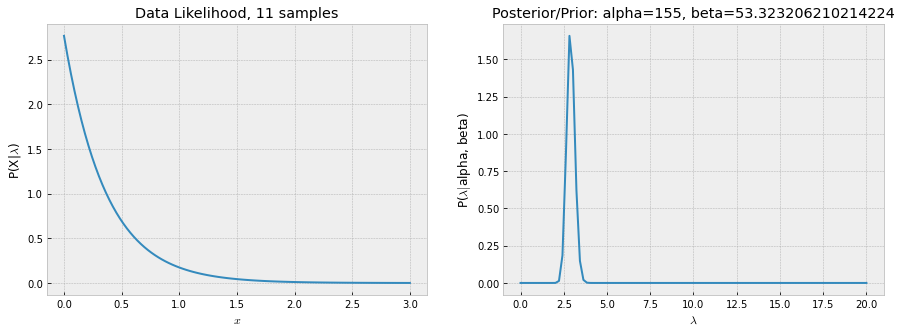

Number of samples:  11
MAP estimate LAMBDA =  2.767308190074585
New alpha =  166
New beta =  59.624728677420244


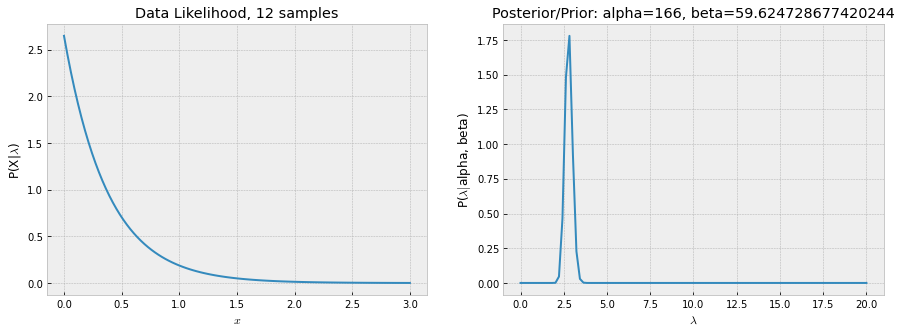

Number of samples:  12
MAP estimate LAMBDA =  2.646579326800858
New alpha =  178
New beta =  66.87878130369693


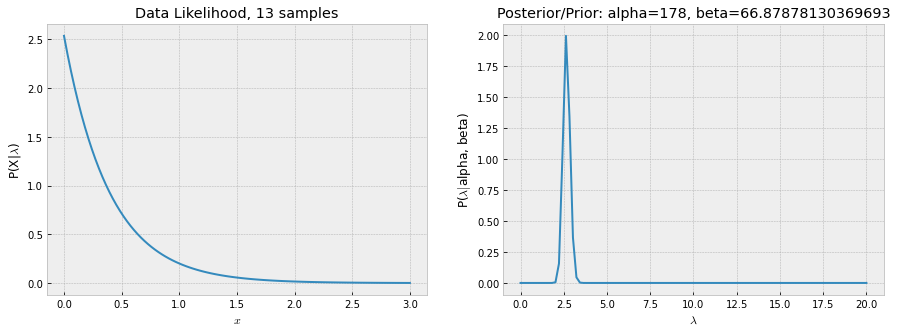

Number of samples:  13
MAP estimate LAMBDA =  2.5352801182361597
New alpha =  191
New beta =  74.94240917732847


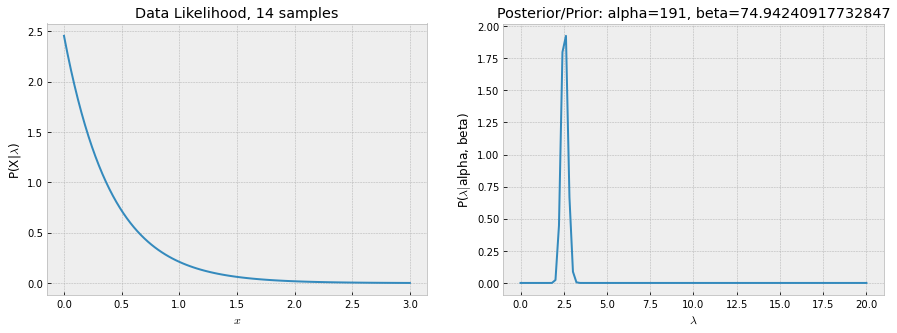

Number of samples:  14
MAP estimate LAMBDA =  2.4537779714475705
New alpha =  205
New beta =  83.13710628009802


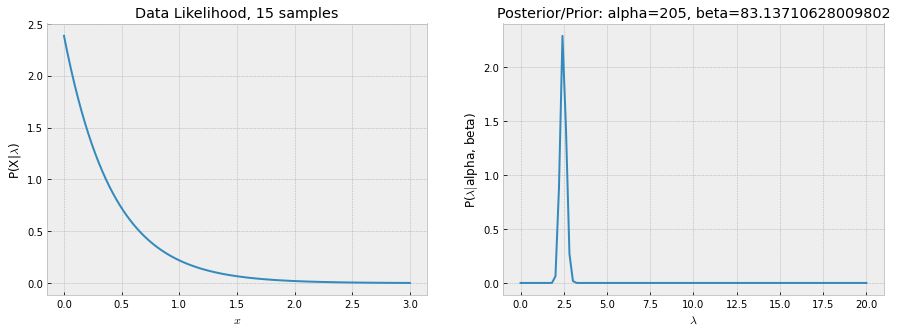

Number of samples:  15
MAP estimate LAMBDA =  2.3849383504550614
New alpha =  220
New beta =  91.82627297607647


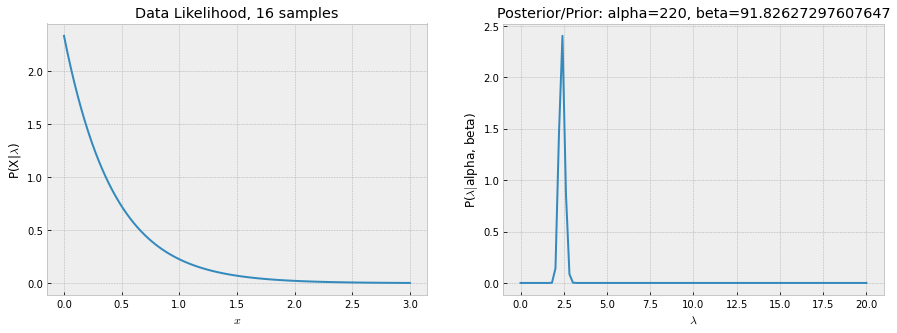

Number of samples:  16
MAP estimate LAMBDA =  2.3352041351895116
New alpha =  236
New beta =  100.63360048860515


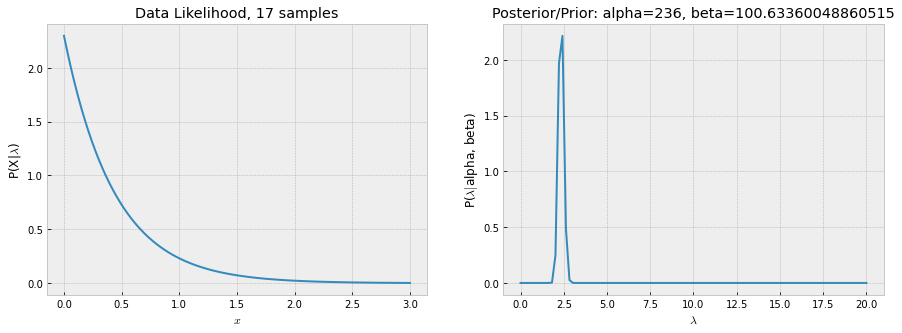

Number of samples:  17
MAP estimate LAMBDA =  2.2966358967727287
New alpha =  253
New beta =  109.7257080907403


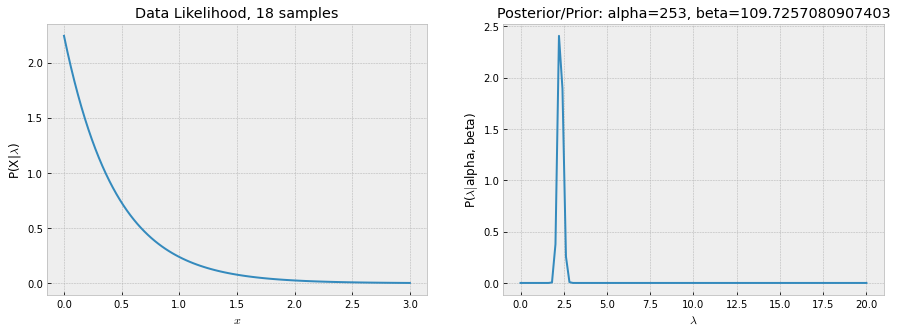

Number of samples:  18
MAP estimate LAMBDA =  2.242655003185417
New alpha =  271
New beta =  120.39301614225018


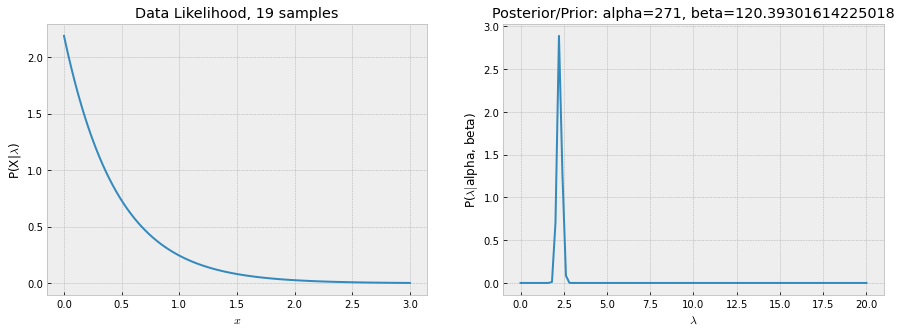

Number of samples:  19
MAP estimate LAMBDA =  2.1893885025025823
New alpha =  290
New beta =  132.00032779456836


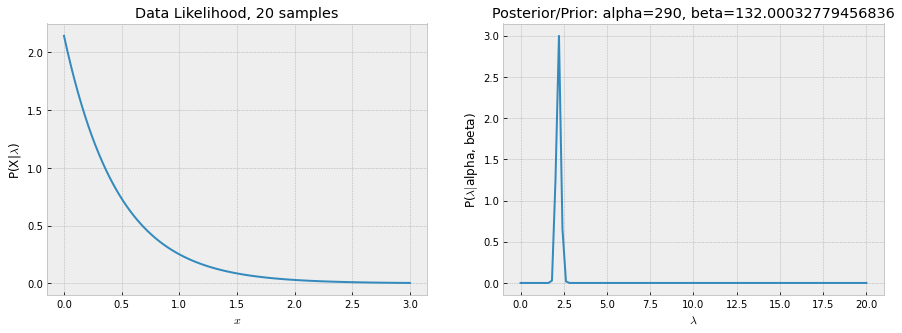

Number of samples:  20
MAP estimate LAMBDA =  2.143082753157503
New alpha =  310
New beta =  144.18481952912737


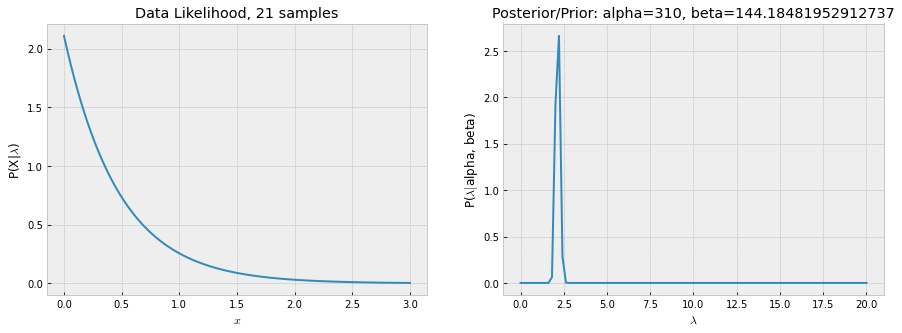

Number of samples:  21
MAP estimate LAMBDA =  2.108288716455702
New alpha =  331
New beta =  156.52505153789917


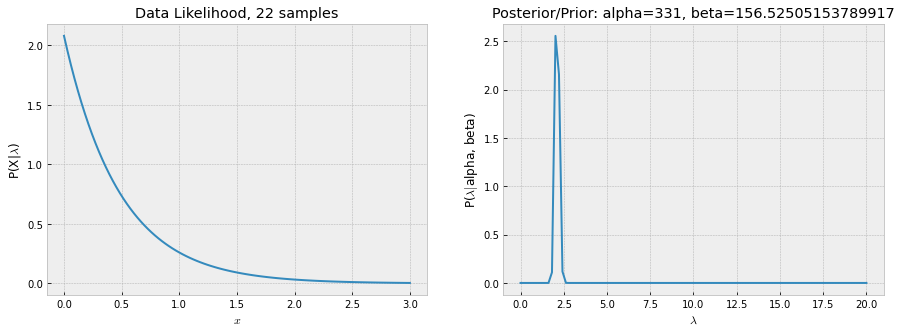

Number of samples:  22
MAP estimate LAMBDA =  2.0794255713945438
New alpha =  353
New beta =  169.2775181964965


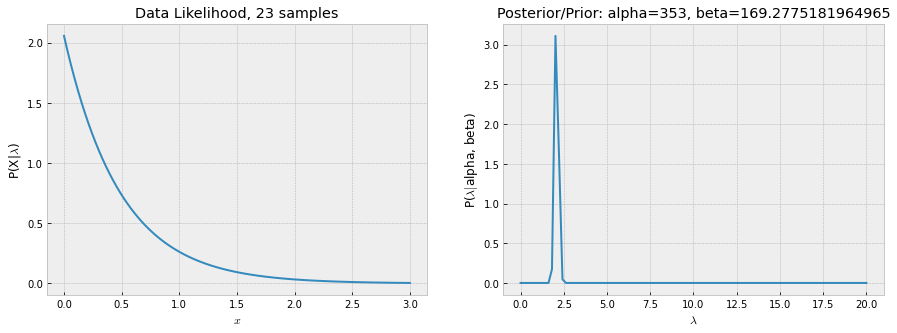

Number of samples:  23
MAP estimate LAMBDA =  2.0567441740736085
New alpha =  376
New beta =  182.32700241823034


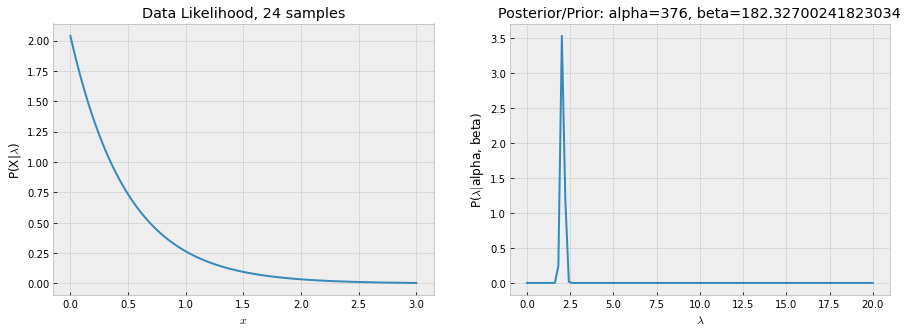

Number of samples:  24
MAP estimate LAMBDA =  2.04027019555847
New alpha =  400
New beta =  195.56233329712703


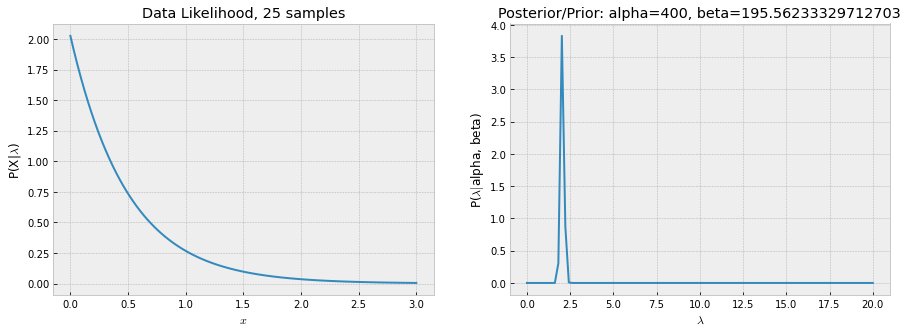

Number of samples:  25
MAP estimate LAMBDA =  2.026067775919835
New alpha =  425
New beta =  209.27236741007044


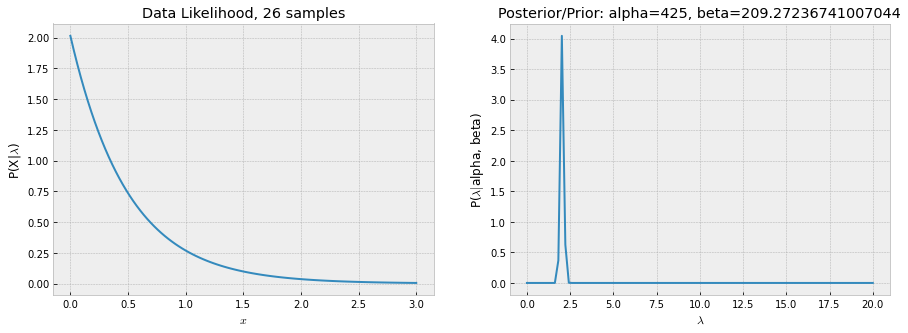

Number of samples:  26
MAP estimate LAMBDA =  2.015284469019103
New alpha =  451
New beta =  223.29353841496527


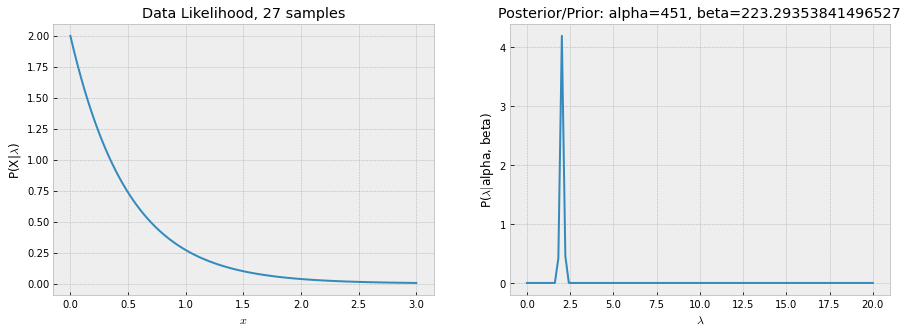

Number of samples:  27
MAP estimate LAMBDA =  1.9992040468462606
New alpha =  478
New beta =  238.59495520353028


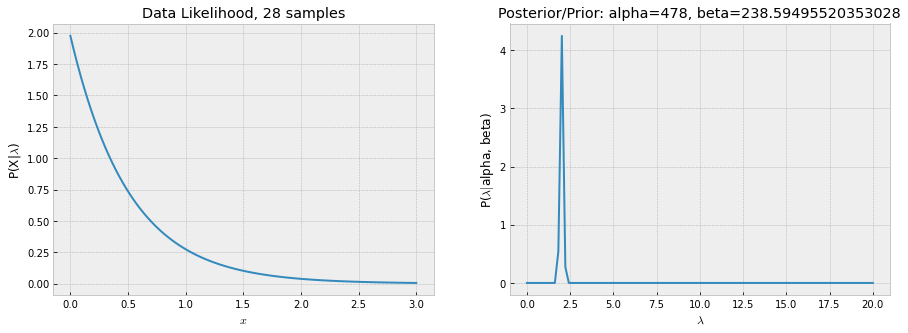

Number of samples:  28
MAP estimate LAMBDA =  1.9751839586539215
New alpha =  506
New beta =  255.6723882792948


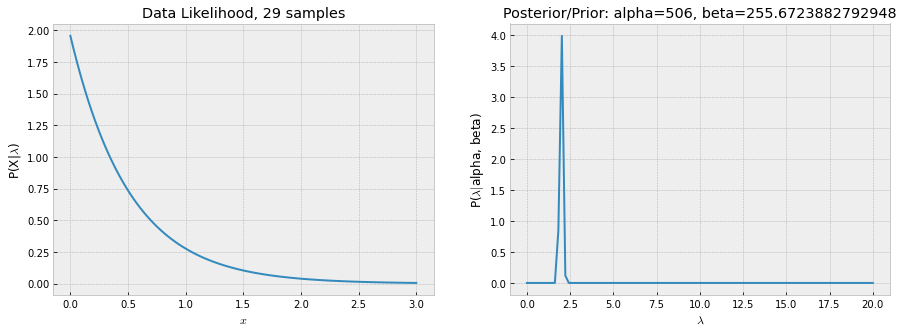

Number of samples:  29
MAP estimate LAMBDA =  1.9557790676768279
New alpha =  535
New beta =  273.03697479200036


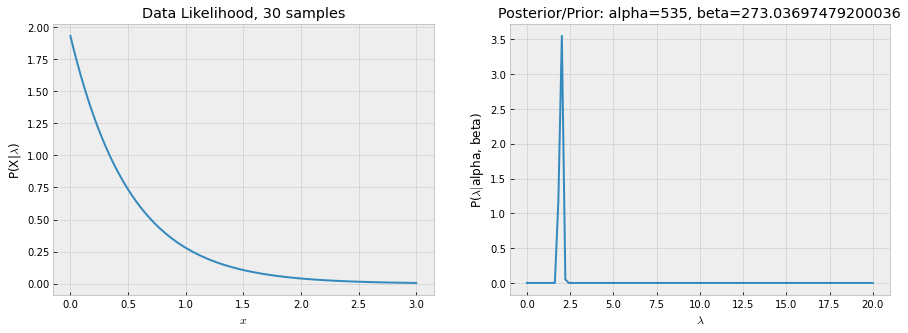

Number of samples:  30
MAP estimate LAMBDA =  1.9315683150794218
New alpha =  565
New beta =  291.9907080670919


In [3]:
from scipy.special import gamma
trueLAM = 2 # true (unknown)
a = 100 # initial value for alpha in prior
b = 10 # initial value for beta in prior

x = np.linspace(0,20,100)
xd = np.linspace(0,3,100)
plt.plot(x, stats.gamma(a,scale=1/b).pdf(x))
plt.xlabel('$\lambda$'); plt.ylabel('P($\lambda$)'); plt.title('Initial Prior')
plt.show()

print('Alpha = ', a)
print('Beta = ', b)

Outcomes=[]
for i in range(1,31):
    Outcomes += [stats.expon(scale=1/trueLAM).rvs(size=1)[0]]
    estimate_lam = (len(Outcomes) + a - 1)/(b + np.sum(Outcomes))
    
    # Data Likelihood:
    fig=plt.figure(figsize=(15,5))
    fig.add_subplot(1,2,1)
    plt.plot(xd, stats.expon(scale=1/estimate_lam).pdf(xd))
    plt.xlabel('$x$'); plt.ylabel('P(X|$\lambda$)'); 
    plt.title('Data Likelihood, '+str(len(Outcomes))+' samples')
    
    # Posterior/Prior:
    fig.add_subplot(1,2,2)
    plt.plot(x, stats.gamma(a,scale=1/b).pdf(x))
    plt.xlabel('$\lambda$'); plt.ylabel('P($\lambda|$alpha, beta)'); 
    plt.title('Posterior/Prior: alpha='+str(a)+', beta='+str(b))
    plt.show()
    
    # Update Prior distribution
    a += len(Outcomes)
    b += np.sum(Outcomes)
    
    # Print estimate for mu
    print('Number of samples: ', len(Outcomes))
#     print('Data: ',Outcomes)
    print('MAP estimate LAMBDA = ', estimate_lam)
    print('New alpha = ', a)
    print('New beta = ', b)